In [1]:
import sys
import time 
sys.path.insert(0, '/home/xilinx/PYNQ-HLS-VISION/tutorial/')

In [2]:
from pynqhls.stream import streamOverlay
overlay = streamOverlay('/home/xilinx/PYNQ-HLS-VISION/tutorial/pynqhls/stream/stream.bit')

In [3]:
from PIL import Image
temp = Image.open("/home/xilinx/PYNQ-HLS-VISION/tutorial/pictures/temp_100x100.jpg")
im = Image.open("/home/xilinx/PYNQ-HLS-VISION/tutorial/pictures/Checkerboard_200x200.jpg")

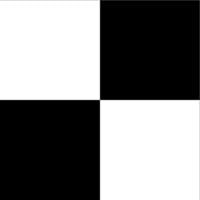

In [4]:
im

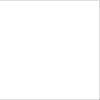

In [5]:
temp

In [6]:
#size of tmphei * tmpwid + inhei * inwid * 4 = (100x100 + 200x200) * 4 (each pixel requires 3 bytes RGB)
in_arg = bytearray(50000*4) 
#print(in_arg[0]) used to determine init values (0)

#temp = Image.open('temp_100x100.jpg') # Can be many different formats.
pix = temp.load()

rowst, colst = temp.size
#preproc temp
for y in range(0,rowst):
    for x in range (0,colst):
        idx = y * 100 + x # 2D index to 1D index 
        idx = idx * 4 # each idx represents a 4 byte integer
        # Set the RGB Values (4 bytes Little-Endian)
        r = pix[y,x][0]
        g = pix[y,x][1]
        b = pix[y,x][2]
        in_arg[idx] = r #RED 
        in_arg[idx+1] = g #GREEN
        in_arg[idx+2] = b #BLUE
        
        #print(idx)



#print(temp.size)  # Get the width and height of the image for iterating over
#print(pix[0,0])  # Get the RGBA Value of the a pixel of an image
#print(pix[0,1])


#print(in_arg[0], in_arg[1], in_arg[2], in_arg[3])
#print(in_arg[4], in_arg[5], in_arg[6], in_arg[7])


#im.save('500x500-RGB.png')  # Save the modified pixels as .png

#im = Image.open('Checkerboard_200x200.jpg') # Can be many different formats.
pix = im.load()
offset = 40000 #100x100 template occupies 40000 bytes (4 bytes for RGB value)
    
rowss, colss = im.size
    
for y in range(0, rowss):
    for x in range (0,colss):
        idx = y * 200 + x # 2D index to 1D index 
        idx = idx * 4 # each idx represents a 4 byte integer
        idx = idx + offset
        # Set the RGB Values (4 bytes Little-Endian)
        r = pix[y,x][0]
        g = pix[y,x][1]
        b = pix[y,x][2]
        in_arg[idx] = r #RED 
        in_arg[idx+1] = g #GREEN
        in_arg[idx+2] = b #BLUE
    ''' FOR DEBUG
            if(x == 150 and y == 150):
                print(in_arg[idx+3])
                print(idx+3)
    print(idx) 
    '''



#print(im.size)  # Get the width and height of the image for iterating over
#print(pix[0,0])  # Get the RGBA Value of the a pixel of an image
#print(pix[0,1])
#print(pix[150,75])

#print(in_arg[offset], in_arg[offset+1], in_arg[offset+2], in_arg[offset+3])
#print(in_arg[offset+4], in_arg[offset+5], in_arg[offset+6], in_arg[offset+7])
#print(in_arg[30074*4+offset], in_arg[30074*4+offset+1], in_arg[30074*4+offset+2], in_arg[30074*4+offset+3])

#return in_arg

#in_arg = list(in_arg)


In [7]:

import time 

coeffs = [0, 0, -1, -2, 0, 2, 1, 0, 0]


In [8]:

t0 = time.time()

output = overlay.run(coeffs, in_arg)

tf= time.time()

print("Elapsed time: " + str(tf-t0))

Elapsed time: 41.09322953224182


In [9]:
pix_matches = bytearray(400000*4)

found = 0 
i = 0 
for a in output:
    if a == 1:
        found+= 1
        #print(i)
        pix_matches[i*4] = 1
    i+= 1
#print(found)

In [10]:
    rows, cols = im.size
    #print(rows,cols)
    count = 0 
    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j 
            idx*= 4 #4 bytes per pixel / binary candidacy
            #print(pix_matches[idx])
            if pix_matches[idx] == 1: 
                #count+= 1
                #print(count)
                #print(i,j)
                z = i - 100 
                if z < 0:
                    z = 0 
                while z < (i):
                    y = j - 100 
                    if y < 0:
                        y = 0 
                    while y < (j):
                            #print(z,y)
                            #print("red", i,j)
                            pix[z,y] = (255,0,0) 
                            y+=1
                    #print(z)
                    z+=1
    im.save("TEMPED_SRC.png")

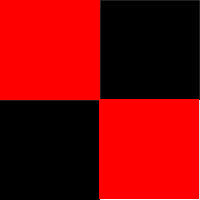

In [11]:
matched = Image.open("TEMPED_SRC.png")
matched

In [16]:
found = 0 
i = 0 
for a in pix_matches:
    if a == 1:
        found+= 1
        print(i)
    i+= 1
print(found)

78796
79596
79600
80396
159996
5
